In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
from common import constraints

In [12]:
def rhs(t, y, m_a, m_chi, g):
    H = 1 / (2*t)
    a, a_dot, chi, chi_dot = y
    return (
        a_dot,
        - 3 * H * a_dot - m_a**2 * a - g * a * chi**2,
        chi_dot,
        - 3 * H * chi_dot - m_chi**2 * chi - g * chi * a**2,
    )

In [95]:
def solve(f_a, chi0, g, span, m_a, m_chi):
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    t0 = 1 / H_inf
    steps = np.geomspace(t0, span * t0, 1000)
    steps[0] = t0
    steps[-1] = span * t0 
    return si.solve_ivp(rhs, (t0, span * t0), (f_a, 0.0, chi0, 0.0), args=(m_a, m_chi, g), t_eval=steps)

In [118]:
f_a = 1e10
chi0 = 1e9
g = 1e-3
m_chi = 1e-2
m_a = 1e-2
span = 1e2
sol_pert = solve(f_a, chi0 + 1e5, g, span, m_a, m_chi)
sol = solve(f_a, chi0, g, span, m_a, m_chi)

Text(0.5, 0, 't * GeV')

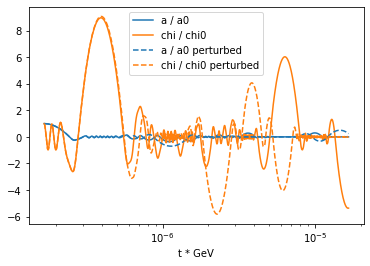

In [119]:
plt.semilogx(sol.t, sol.y[0] / f_a, ls="-", color="tab:blue", label="a / a0")
plt.semilogx(sol.t, sol.y[2] / chi0, ls="-", color="tab:orange", label="chi / chi0")
plt.semilogx(sol_pert.t, sol_pert.y[0] / f_a, ls="--", color="tab:blue", label="a / a0 perturbed")
plt.semilogx(sol_pert.t, sol_pert.y[2] / chi0, ls="--", color="tab:orange", label="chi / chi0 perturbed")
plt.legend()
plt.xlabel("t * GeV")

Text(0, 0.5, 'chi / chi0')

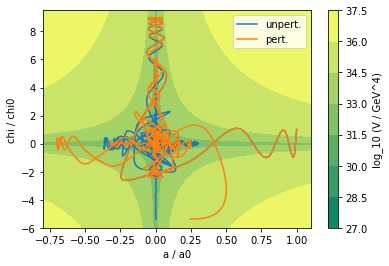

In [120]:
a_range = np.linspace(-0.8 * f_a, 1.1 * f_a, 100)
chi_range = np.linspace(-6 * chi0, 9.5 * chi0, 100)
aa, cc = np.meshgrid(a_range, chi_range)
V = 0.5 * m_a**2 * aa**2 + 0.5 * m_chi**2 * cc**2 + g * aa**2 * cc**2 
plt.contourf(a_range / f_a, chi_range / chi0, np.log10(V), cmap="summer")
plt.colorbar().set_label("log_10 (V / GeV^4)")
plt.plot(sol.y[0] / f_a, sol.y[2] / chi0, label="unpert.")
plt.plot(sol_pert.y[0] / f_a, sol.y[2] / chi0, label="pert.")
plt.legend()
plt.xlabel("a / a0")
plt.ylabel("chi / chi0")